In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.langevin import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.io.trajectory import Trajectory
from ase import units
from ase.calculators.emt import EMT

size = 3
a = 4.24068463425528
T = 1023  # Kelvin
T *= units.kB
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          latticeconstant=a,
                          symbol="H",
                          size=(size, size, size),
                          pbc=True)

calc = EMT()
atoms.set_calculator(calc)

MaxwellBoltzmannDistribution(atoms, T, force_temp=True)

dyn = Langevin(atoms, 2 * units.fs, T, 0.1)

# Data storage
steps = []
epot_list = []
ekin_list = []
total_energy_list = []
temperature_list = []

step = 0
interval = 1

def printenergy(a=atoms):  
    global step, interval
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    temp = ekin / (1.5 * units.kB)
    
    steps.append(step)
    epot_list.append(epot)
    ekin_list.append(ekin)
    total_energy_list.append(epot + ekin)
    temperature_list.append(temp)
    
    print('Step={:<8d} Epot={:.5f} Ekin={:.5f} T={:.3f} Etot={:.5f}'.format(
        step, epot, ekin, temp, epot + ekin))
    
    step += interval
    
dyn.attach(printenergy, interval=1)

traj = Trajectory('md.traj', 'w', atoms)
dyn.attach(traj.write, interval=5)

dyn.run(1000)


/var/folders/dx/b9tk_hhd1x1dxjmtzwfq_p6w0000gn/T/ipykernel_20252/4263218350.py:22: FutureWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)


Step=0        Epot=3.18999 Ekin=0.13223 T=1023.000 Etot=3.32222
Step=1        Epot=3.18903 Ekin=0.13103 T=1013.678 Etot=3.32006
Step=2        Epot=3.18579 Ekin=0.13340 T=1032.038 Etot=3.31920
Step=3        Epot=3.17906 Ekin=0.14186 T=1097.454 Etot=3.32092
Step=4        Epot=3.16488 Ekin=0.15554 T=1203.321 Etot=3.32042
Step=5        Epot=3.12698 Ekin=0.20266 T=1567.885 Etot=3.32964
Step=6        Epot=3.25393 Ekin=2.69607 T=20857.731 Etot=5.95000
Step=7        Epot=3.23965 Ekin=15.55717 T=120355.658 Etot=18.79682
Step=8        Epot=3.11609 Ekin=33.61681 T=260071.336 Etot=36.73290
Step=9        Epot=3.79630 Ekin=98.09226 T=758875.882 Etot=101.88856
Step=10       Epot=5.11130 Ekin=360.39426 T=2788135.426 Etot=365.50556
Step=11       Epot=5.00694 Ekin=827.44008 T=6401364.463 Etot=832.44702
Step=12       Epot=3.44661 Ekin=1178.17716 T=9114788.528 Etot=1181.62377
Step=13       Epot=3.61204 Ekin=1314.69809 T=10170961.957 Etot=1318.31013
Step=14       Epot=2.41942 Ekin=1407.29480 T=10887322.383

True

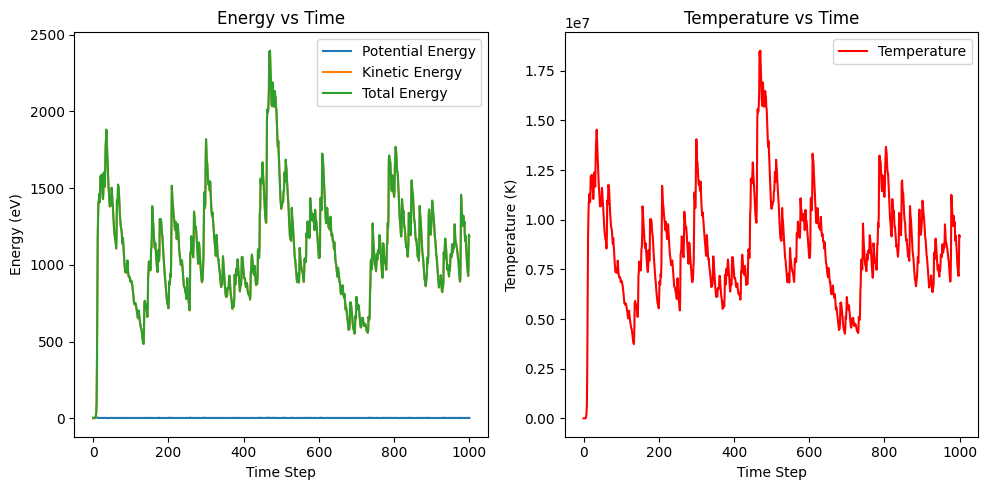

In [6]:

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(steps, epot_list, label='Potential Energy')
plt.plot(steps, ekin_list, label='Kinetic Energy')
plt.plot(steps, total_energy_list, label='Total Energy')
plt.xlabel('Time Step')
plt.ylabel('Energy (eV)')
plt.legend()
plt.title('Energy vs Time')

plt.subplot(1, 2, 2)
plt.plot(steps, temperature_list, label='Temperature', color='r')
plt.xlabel('Time Step')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Temperature vs Time')

plt.tight_layout()
plt.show()


In [7]:
from utils import *
draw_system(atoms)

2025-01-31 16:36:26.892 python[20307:5286610] +[IMKClient subclass]: chose IMKClient_Legacy
2025-01-31 16:36:26.892 python[20307:5286610] +[IMKInputSession subclass]: chose IMKInputSession_Legacy
